# **TikTok Project - Regression Analysis**

As from the previous EDA, we found that the videos that are verified are most likely to post an opinion than a claim. Let's build a logistic regression model to predict what factors contribute to a verified status.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Load dataset into dataframe
data = pd.read_csv("C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\tiktok_dataset.csv")

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

In [5]:
# Get basic information
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [7]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
# Drop rows with missing values
data = data.dropna(axis=0).reset_index(drop=True)
data.isna().sum().sum()

0

In [9]:
# Check for duplicates
print('Number of records with duplicates:', data.shape[0])

data.drop_duplicates(inplace=True)
print('Number of records without duplicates:', data.shape[0])

Number of records with duplicates: 19084
Number of records without duplicates: 19084


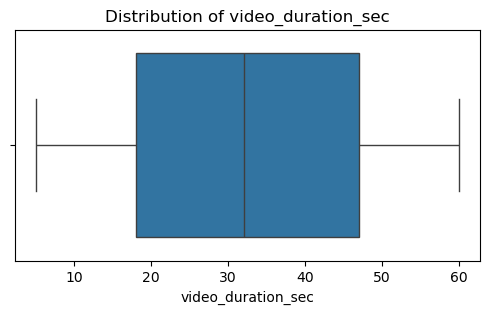

In [10]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,3))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Distribution of video_duration_sec')
plt.show()

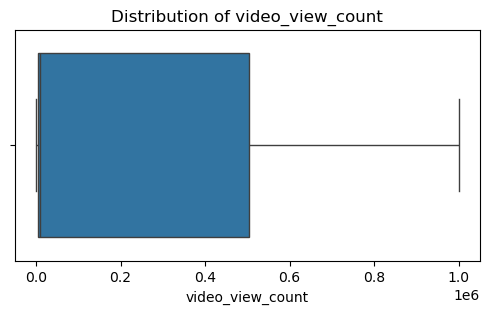

In [11]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,3))
sns.boxplot(x=data['video_view_count'])
plt.title('Distribution of video_view_count')
plt.show()

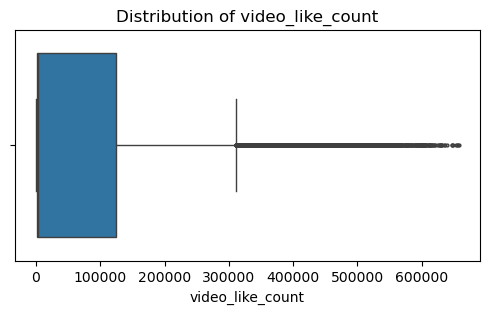

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,3))
sns.boxplot(x=data['video_like_count'], fliersize=2)
plt.title('Distribution of video_like_count')
plt.show()

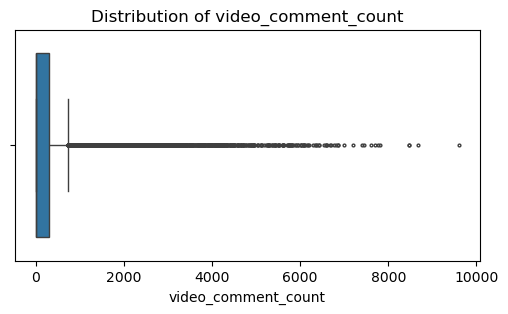

In [13]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,3))
sns.boxplot(x=data['video_comment_count'], fliersize=2)
plt.title('Distribution of video_comment_count')
plt.show()

In [14]:
# Check for and handle outliers for video_like_count
like_q1 = data['video_like_count'].quantile(0.25)
like_q3 = data['video_like_count'].quantile(0.75)
like_iqr = like_q3 - like_q1
upper_threshold = (like_q3 - like_q1) + 1.5*like_iqr
data.loc[data['video_like_count'] > upper_threshold, 'video_like_count'] = upper_threshold

In [15]:
# Check for and handle outliers for video_comment_count
comment_q1 = data['video_comment_count'].quantile(0.25)
comment_q3 = data['video_comment_count'].quantile(0.75)
iqr = comment_q3 - comment_q1
upper_limit = (comment_q3 - comment_q1) + 1.5*iqr
data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

In [16]:
# Check class balance for video_comment_count
data['verified_status'].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94% of the dataset represents videos posted by unverified accounts and 6.2% represents videos posted by verified accounts. So, the outcome variable is not balanced.

In [17]:
# Use resampling to create class balance in the outcome variable

# Identify data points from majority and minority classes
majority_class = data[data['verified_status']=='not verified']
minority_class = data[data['verified_status']=='verified']

# Upsample the minority class (which is "verified")
minority_upsampled = resample(minority_class,
                             replace=True,
                             n_samples=len(majority_class),
                             random_state=0)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled['verified_status'].value_counts(normalize=True)

not verified    0.5
verified        0.5
Name: verified_status, dtype: float64

In [18]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled.groupby([ 'verified_status'])[['video_transcription_text']].agg(func=lambda arr: np.mean([len(text) for text in arr]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [19]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['transcription_length'] = data_upsampled['video_transcription_text'].apply(func=(lambda x: len(x)))

In [20]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


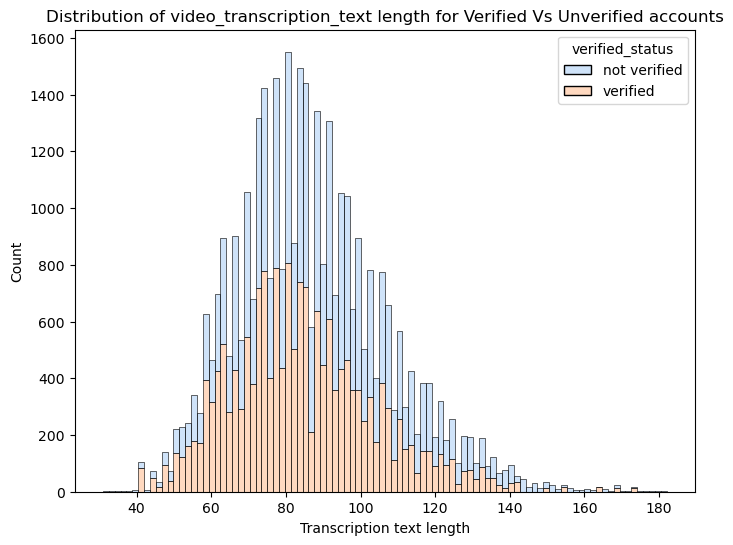

In [21]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
plt.figure(figsize=(8,6))
sns.histplot(data=data_upsampled,
             x='transcription_length',
             hue='verified_status',
             multiple='stack',
             legend=True,
             palette='pastel',
             alpha=0.5)
plt.xlabel('Transcription text length')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for Verified Vs Unverified accounts')
plt.show()

In [22]:
# Code a correlation matrix to help determine most correlated variables
correlation = data_upsampled.corr(method='pearson')
correlation

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626665,-0.504015,-0.487096,-0.608912,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005980,0.010515,0.008753,0.012671,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004501,0.002206,0.003989,-0.001087,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.857052,0.711313,0.690048,0.748438,0.244693
video_like_count,-0.626665,0.005980,0.004501,0.857052,1.000000,0.831971,0.805380,0.818214,0.216764
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.831971,1.000000,0.710117,0.671316,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805380,0.710117,1.000000,0.793558,0.173396
video_comment_count,-0.608912,0.012671,-0.001087,0.748438,0.818214,0.671316,0.793558,1.000000,0.217710
transcription_length,-0.193677,-0.007083,-0.002981,0.244693,0.216764,0.171651,0.173396,0.217710,1.000000


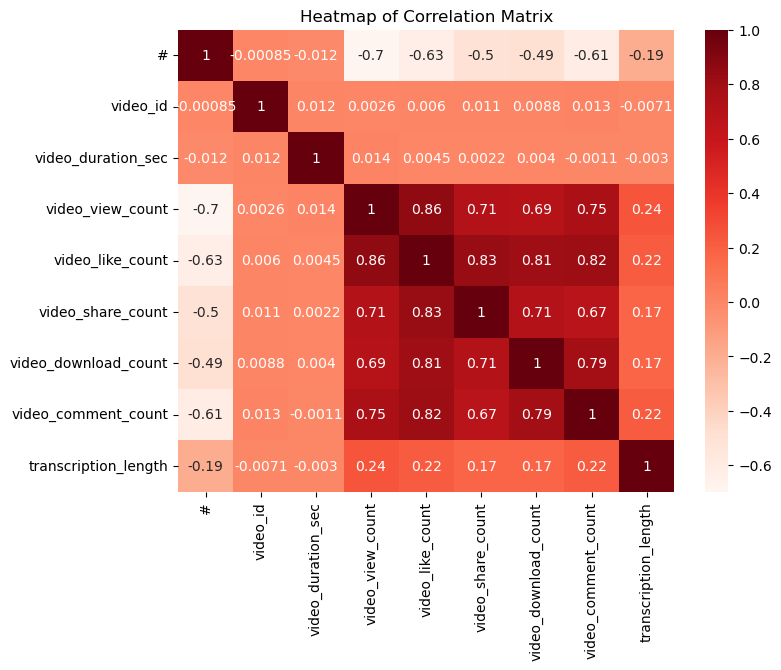

In [24]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(correlation,
           annot=True,
           cmap='Reds')
plt.title('Heatmap of Correlation Matrix')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. As we could see that `video_like_count` is highly correlated to all the other features, we drop it.

### Data Preprocessing

In [25]:
# Select outcome variable
y = data_upsampled['verified_status']

In [26]:
# Select features
X = data_upsampled[['video_duration_sec','claim_status','author_ban_status','video_view_count','video_share_count','video_download_count','video_comment_count']]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
# Get shape of each training and testing set
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (26826, 7)
y_train shape: (26826,)
X_test shape: (8942, 7)
y_test shape: (8942,)


In [29]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [30]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [31]:
# Select the training features that needs to be encoded
X_train_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
X_train_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [32]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [33]:
# Fit and transform the training features using the encoder
X_train_encode = encoder.fit_transform(X_train_encode)

In [34]:
# Get feature names from encoder
encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [35]:
# Display first few rows of encoded training features
X_train_encode[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [36]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encode_df = pd.DataFrame(X_train_encode, columns=encoder.get_feature_names_out())

# Display first few rows
X_train_encode_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [37]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train = X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)

X_train.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,33,2252.0,23.0,4.0,0.0
1,52,6664.0,550.0,53.0,2.0
2,37,6327.0,257.0,3.0,0.0
3,57,1702.0,28.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0


In [38]:
# Concatenate `X_train` and `X_train_encode_df` to form the final dataframe for training data
X_train_final = pd.concat([X_train, X_train_encode_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [39]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [40]:
# Encode the training outcome variable
# reshape the y_train as OneHotEncoder takes in 2D array
y_train_encode = encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_encode

array([1., 1., 1., ..., 1., 1., 0.])

### **Model building**

In [41]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_encode)

### Results and evaluation

In [42]:
# Select the testing features that needs to be encoded
X_test_encode = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
X_test_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [43]:
# Transform the testing features using the encoder
X_test_encode = encoder.fit_transform(X_test_encode)

# Display first few rows of encoded testing features
X_test_encode

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [44]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encode_df = pd.DataFrame(X_test_encode, columns=encoder.get_feature_names_out())

# Display first few rows
X_test_encode_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [45]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped
X_test = X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)

X_test.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,41,2118.0,57.0,5.0,2.0
1,27,5701.0,157.0,1.0,0.0
2,31,449767.0,75385.0,5956.0,727.5
3,19,792813.0,56597.0,5146.0,727.5
4,54,2044.0,68.0,19.0,2.0


In [46]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test, X_test_encode_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,727.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,727.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [47]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [48]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [49]:
# Encode the testing outcome variable
y_test_encode = encoder.fit_transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_encode

array([1., 1., 1., ..., 0., 1., 1.])

In [50]:
# Confirm that dimensions of training and testing are in alignment
X_train_final.shape, X_test_final.shape, y_train_encode.shape, y_test_encode.shape

((26826, 8), (8942, 8), (26826,), (8942,))

### Visualize model results

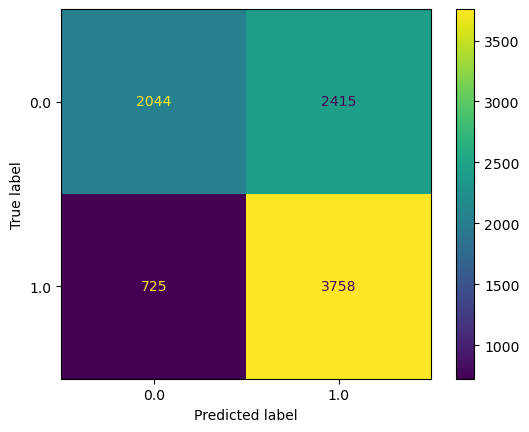

In [51]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test_encode, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [52]:
# Classification report
target_labels = ['verified', 'not_verified']
print(classification_report(y_test_encode, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not_verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



### **Task 4c. Interpret model coefficients**

In [81]:
# Get the feature names from the model and the model coefficients
model_coef = pd.DataFrame(data={"Feature":clf.feature_names_in_, "Coefficient":clf.coef_[0]})
model_coef

,Feature,Coefficient
0,video_duration_sec,8.608724e-03
1,video_view_count,-2.131798e-06
2,video_share_count,5.931458e-06
3,video_download_count,-1.097485e-05
4,video_comment_count,-6.417262e-04
5,claim_status_opinion,3.908931e-04
6,author_ban_status_banned,-1.782069e-05
7,author_ban_status_under review,-9.687904e-07


1. We have used logistic regression on to predict the catergorical variable 'verified_status' as it's a binary outcome. There is a strong correlation of independent variables which violates the assumptions of logistic regression. Therefore, we dropped video_like_count which is highly correlated with other variables. The model is not so accurate as the accuracy is just 65% which is far less than the bench mark. But, the recall is good with 84%.
2. From the regression results, every one second increase in the video duration has 0.009 log-odds increase in the account verification status. All the other variables seem to have least association with the outcome variable as their coefficients are very small.